In [11]:
import os
import pickle

In [12]:
RESULTS_FOLDER = "results"
models = os.listdir(RESULTS_FOLDER)

res = {}
for model in models:
    with open(os.path.join(RESULTS_FOLDER, model, "training_results.pkl"), "rb") as f:
        res[model] = pickle.load(f)

res

{'openl3': {('sons_al_balco_2020',
   'sons_al_balco_2020'): {'0': {'precision': 0.0,
    'recall': 0.0,
    'f1-score': 0.0,
    'support': 0}, '1': {'precision': 1.0,
    'recall': 0.5333333333333333,
    'f1-score': 0.6956521739130436,
    'support': 30}, '2': {'precision': 0.0,
    'recall': 0.0,
    'f1-score': 0.0,
    'support': 5}, '3': {'precision': 0.0,
    'recall': 0.0,
    'f1-score': 0.0,
    'support': 4}, '4': {'precision': 0.9111111111111111,
    'recall': 0.5942028985507246,
    'f1-score': 0.7192982456140351,
    'support': 69}, '5': {'precision': 0.95,
    'recall': 0.8382352941176471,
    'f1-score': 0.890625,
    'support': 68}, '6': {'precision': 0.8666666666666667,
    'recall': 1.0,
    'f1-score': 0.9285714285714286,
    'support': 13}, '7': {'precision': 0.0,
    'recall': 0.0,
    'f1-score': 0.0,
    'support': 0}, '8': {'precision': 1.0,
    'recall': 0.7692307692307693,
    'f1-score': 0.8695652173913044,
    'support': 26}, '9': {'precision': 0.830065359

In [13]:
res.keys()

dict_keys(['openl3', 'wav2vec', 'yamnet'])

In [14]:
res["openl3"].keys()

dict_keys([('sons_al_balco_2020', 'sons_al_balco_2020'), ('sons_al_balco_2020', 'sons_al_balco_2021'), ('sons_al_balco_2020', 'granollers'), ('sons_al_balco_2021', 'sons_al_balco_2020'), ('sons_al_balco_2021', 'sons_al_balco_2021'), ('sons_al_balco_2021', 'granollers'), ('granollers', 'sons_al_balco_2020'), ('granollers', 'sons_al_balco_2021'), ('granollers', 'granollers')])

In [15]:
res["openl3"][("sons_al_balco_2020", "sons_al_balco_2020")].keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', 'micro avg', 'macro avg', 'weighted avg', 'samples avg'])

In [16]:
datasets_pairs = res["openl3"].keys()
datasets = sorted(set([d[0] for d in datasets_pairs]))
datasets_to_plot = [e.replace("_", " ").capitalize() for e in datasets]
models = res.keys()

In [17]:
from utils import load_labels, compute_all_labels

labels = load_labels("data")
all_labels = compute_all_labels(labels)
all_labels

['Human/Cough',
 'Human/Movement',
 'Human/Movement/Steps',
 'Human/Music',
 'Human/Voice',
 'Industrial/Construction',
 'Industrial/Industry',
 'Industrial/Vacuum',
 'Industrial/Ventilation',
 'Nature/Animals/Bird',
 'Nature/Animals/Cat',
 'Nature/Animals/Dog',
 'Nature/Elements/Water',
 'Nature/Elements/Wind',
 'Nature/Vegetation',
 'Signals',
 'Signals/Alarm',
 'Signals/Bells',
 'Signals/Klaxon',
 'Signals/Siren',
 'Things/Blind',
 'Things/Door',
 'Things/Movement',
 'Things/Trolley',
 'Transport/Motorized',
 'Transport/Motorized/Air',
 'Transport/Motorized/Rail',
 'Transport/Motorized/Road',
 'Transport/Non-motorized']

In [18]:
for model in models:
    for dataset_pair in datasets_pairs:
        print()
        print(model, dataset_pair)
        print(res[model][dataset_pair]["micro avg"])
        print(res[model][dataset_pair]["macro avg"])
        print(res[model][dataset_pair]["weighted avg"])
        print(res[model][dataset_pair]["samples avg"])


openl3 ('sons_al_balco_2020', 'sons_al_balco_2020')
{'precision': 0.8640897755610972, 'recall': 0.7640573318632855, 'f1-score': 0.8110005851375073, 'support': 907}
{'precision': 0.5268206133027924, 'recall': 0.4274027386584046, 'f1-score': 0.4647142658820083, 'support': 907}
{'precision': 0.8364822297901152, 'recall': 0.7640573318632855, 'f1-score': 0.7876383738982456, 'support': 907}
{'precision': 0.7525370804059328, 'recall': 0.765807962529274, 'f1-score': 0.7552302888368463, 'support': 907}

openl3 ('sons_al_balco_2020', 'sons_al_balco_2021')
{'precision': 0.531416400425985, 'recall': 0.32423651721897334, 'f1-score': 0.40274414850686036, 'support': 1539}
{'precision': 0.11494260167518819, 'recall': 0.07196380579652331, 'f1-score': 0.07324817660943679, 'support': 1539}
{'precision': 0.34806252063551396, 'recall': 0.32423651721897334, 'f1-score': 0.31256014463398585, 'support': 1539}
{'precision': 0.3453647416413374, 'recall': 0.34675785207700105, 'f1-score': 0.3383738601823708, 'sup

Confusion matrices for openl3
Confusion matrices for wav2vec
Confusion matrices for yamnet


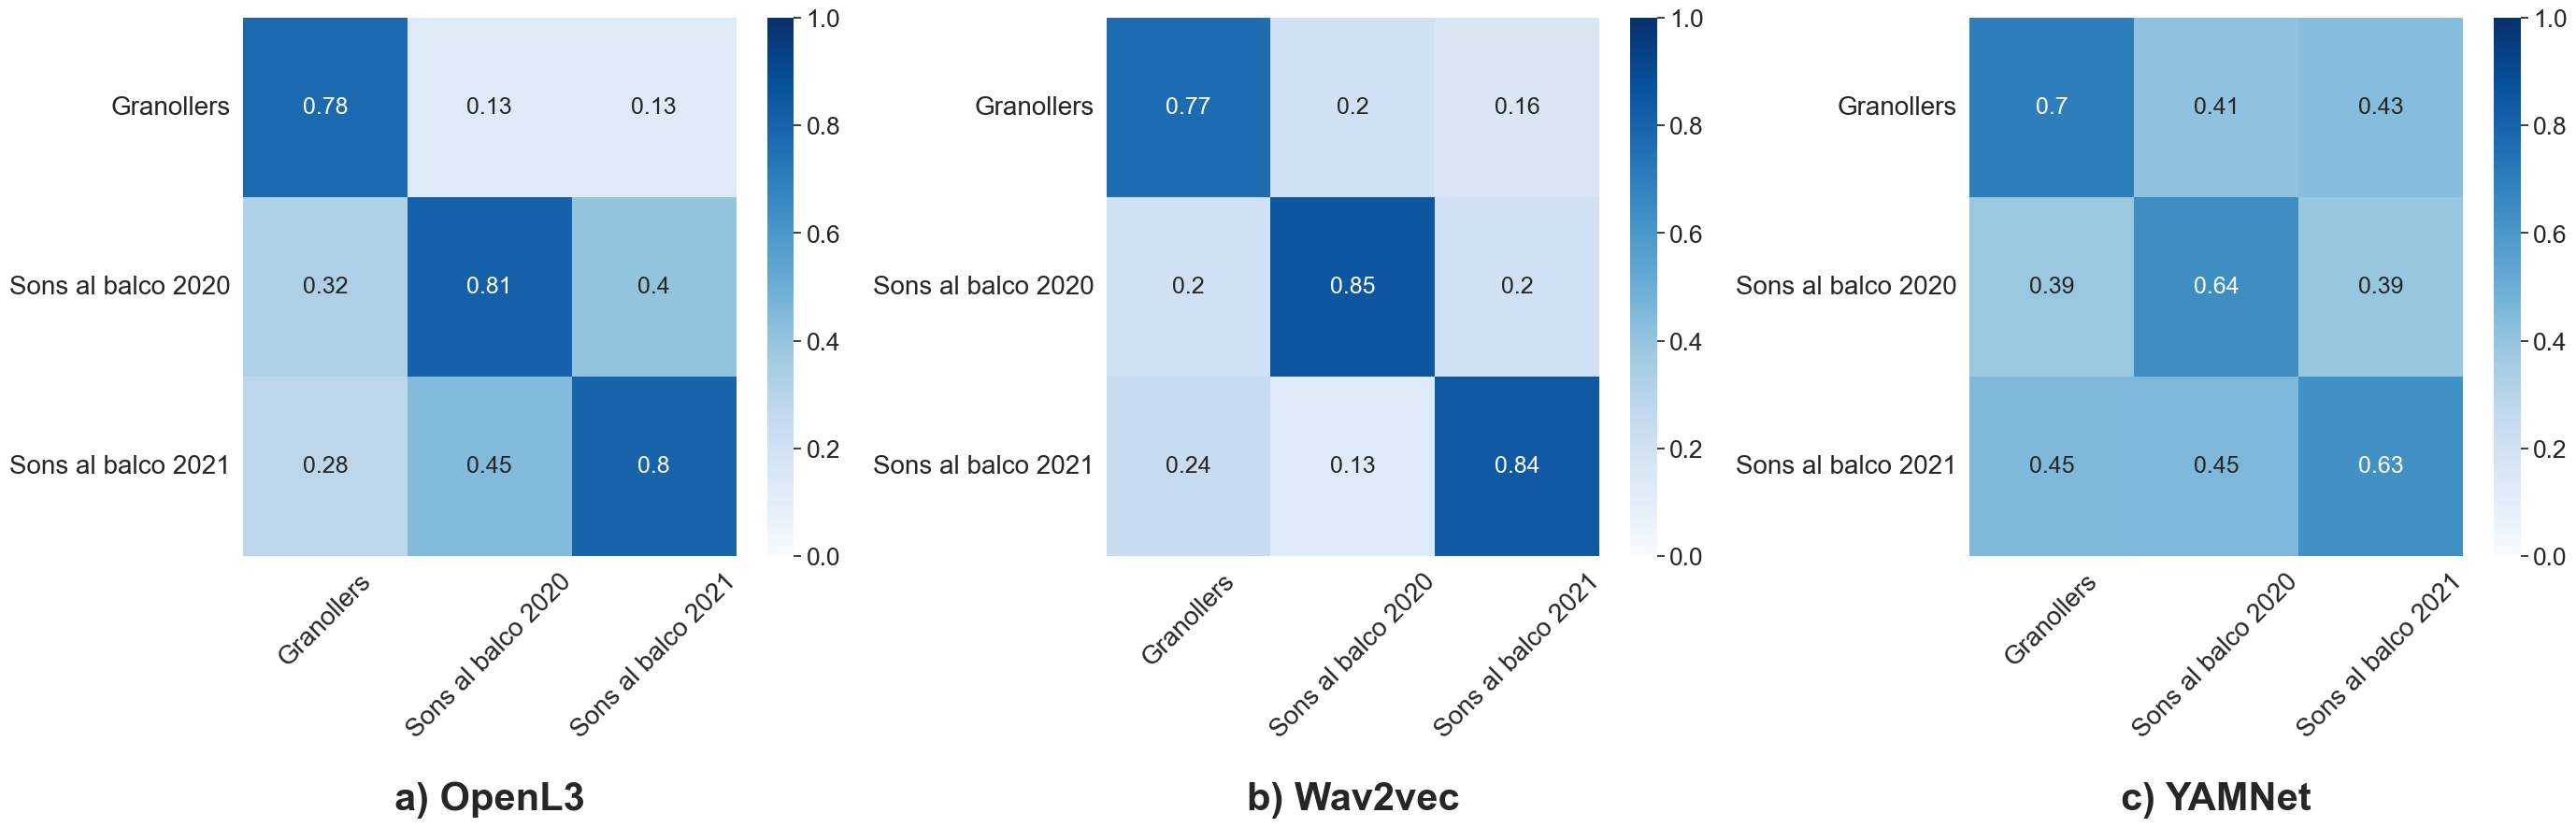

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Increase font size for better visibility
sns.set(font_scale=1.2)

fig, axs = plt.subplots(1, len(models), figsize=(28, 10))

for idx, model in enumerate(models):
    res_matr = np.zeros((len(datasets), len(datasets)))
    for i, d1 in enumerate(datasets):
        for j, d2 in enumerate(datasets):
            dataset_pair = (d1, d2)
            res_matr[i, j] = res[model][dataset_pair]["micro avg"]["f1-score"]
    
    print(f"Confusion matrices for {model}")
    ax = sns.heatmap(res_matr, annot=True, annot_kws={"size": 18}, vmin=0, vmax=1, cmap=plt.cm.Blues, xticklabels=datasets_to_plot, yticklabels=datasets_to_plot, ax=axs[idx])
    
    # Increase size of x and y tick labels
    ax.tick_params(axis='both', which='major', labelsize=20)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Adjust rotation angle as needed
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)  # Rotation of y tick labels
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=19)  # Increase colorbar tick label size
    
    # Add the corresponding text under each heatmap
    model_name = "YAMNet" if model == "yamnet" else "OpenL3" if model == "openl3" else "Wav2Vec" if model == "Wav2vec" else model.capitalize()
    text = f"{chr(97 + idx)}) {model_name}"
    ax.text(0.5, -0.47, text, fontsize=30, ha='center', transform=ax.transAxes, weight='bold')

plt.tight_layout()
plt.show()


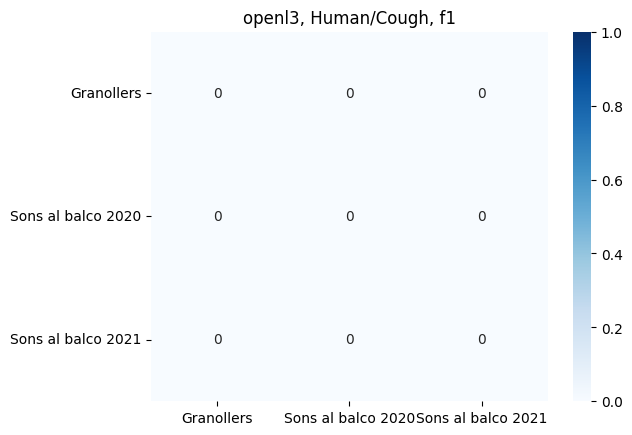

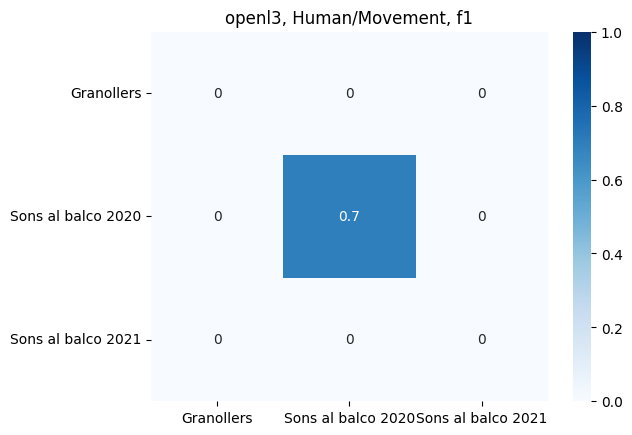

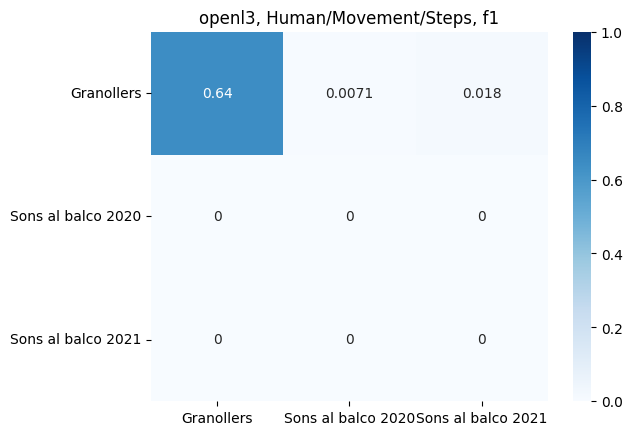

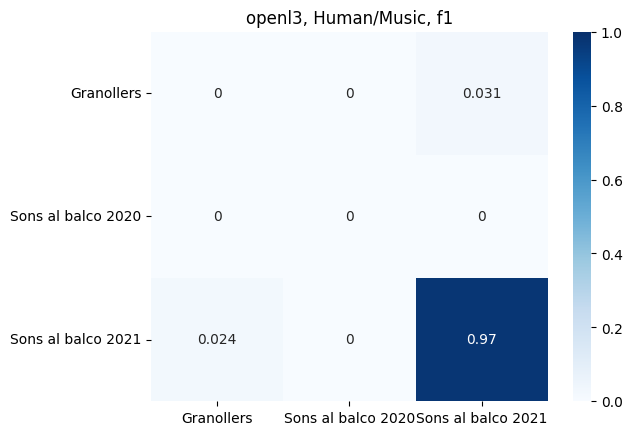

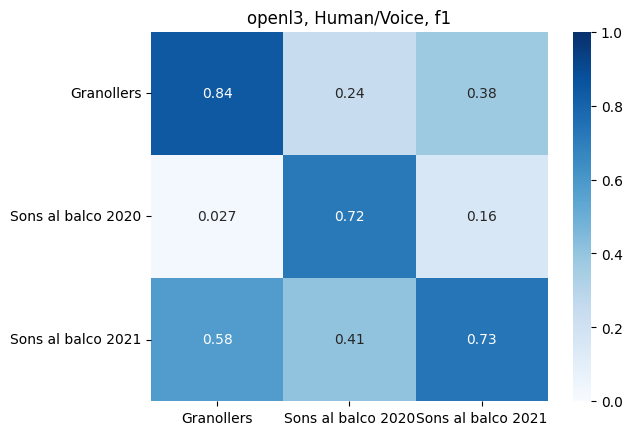

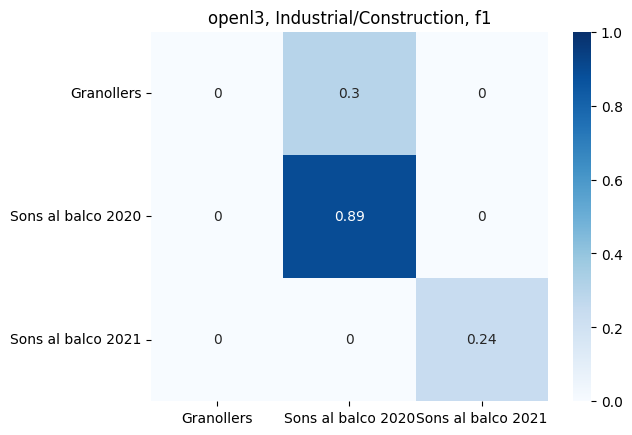

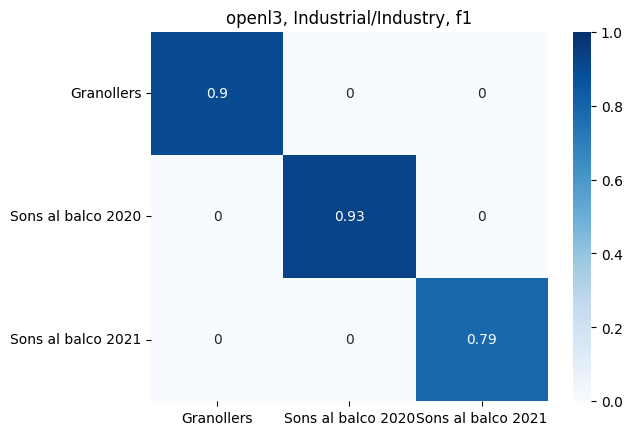

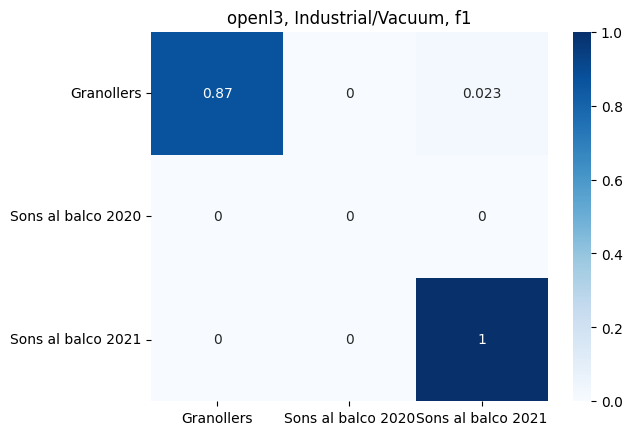

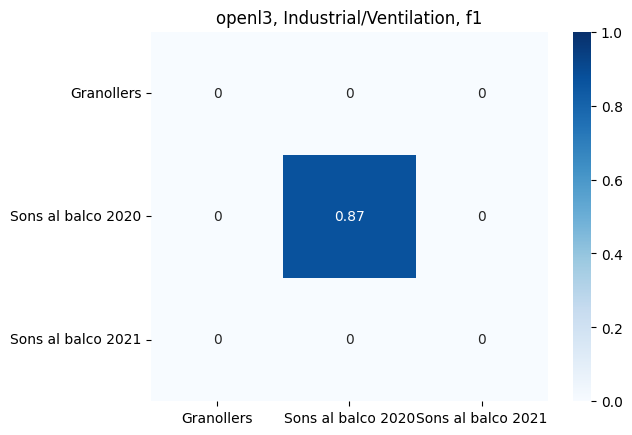

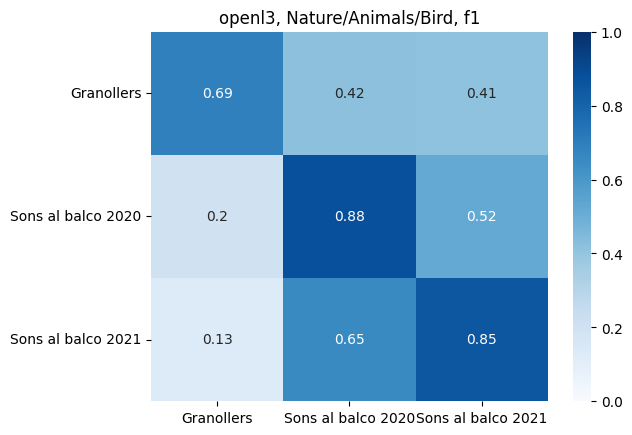

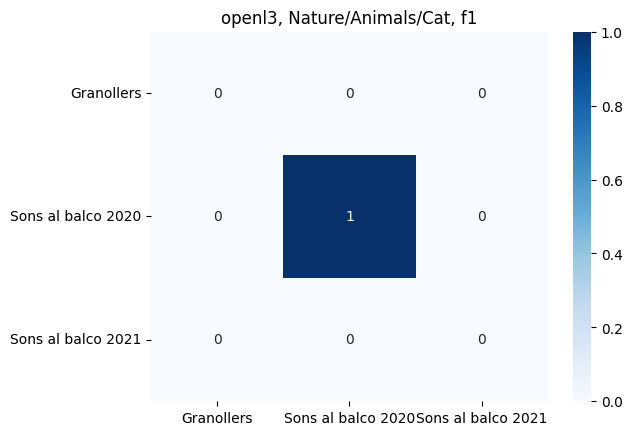

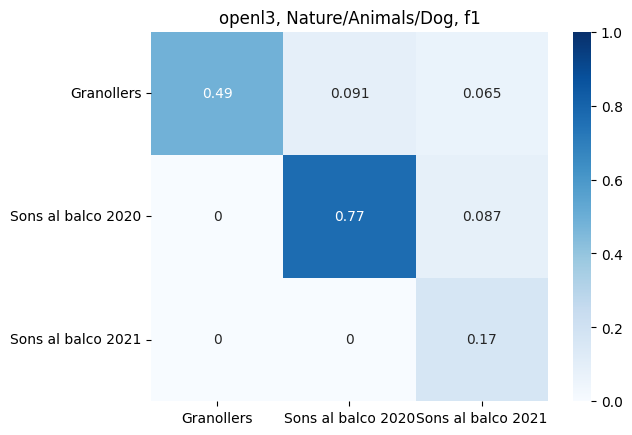

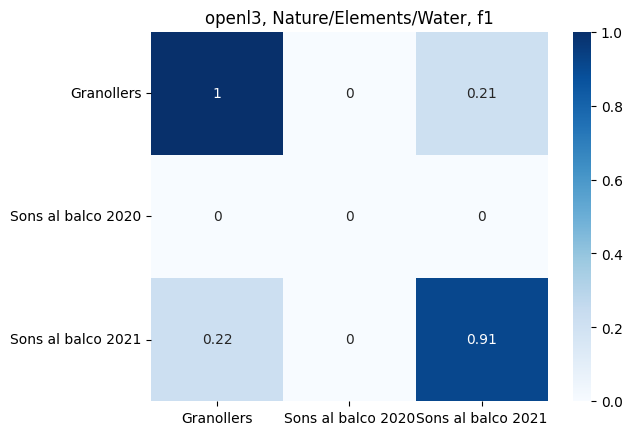

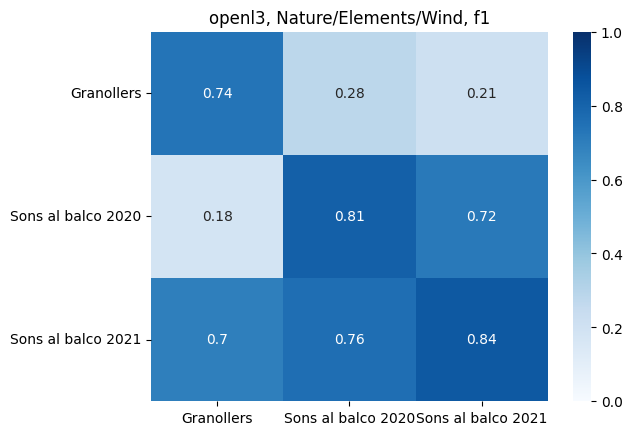

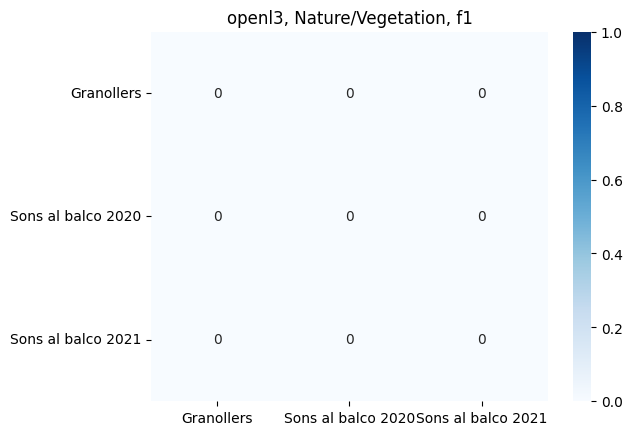

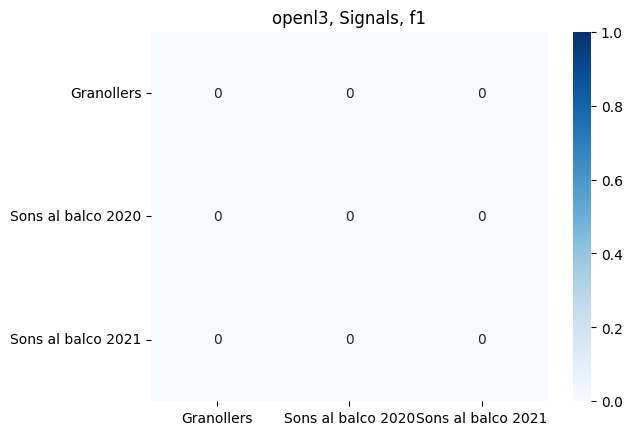

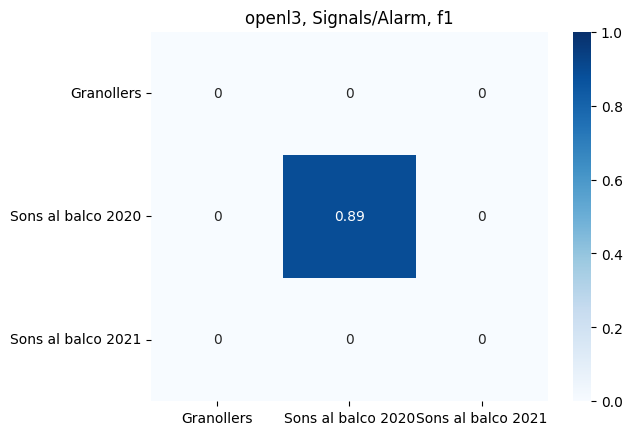

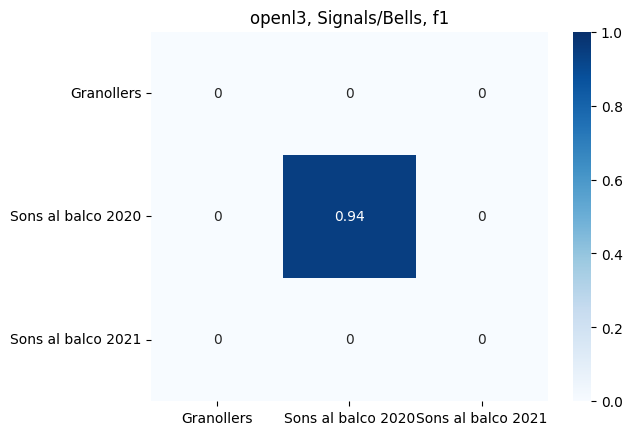

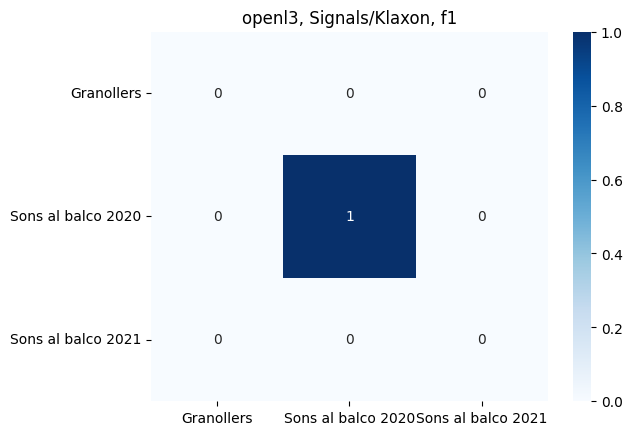

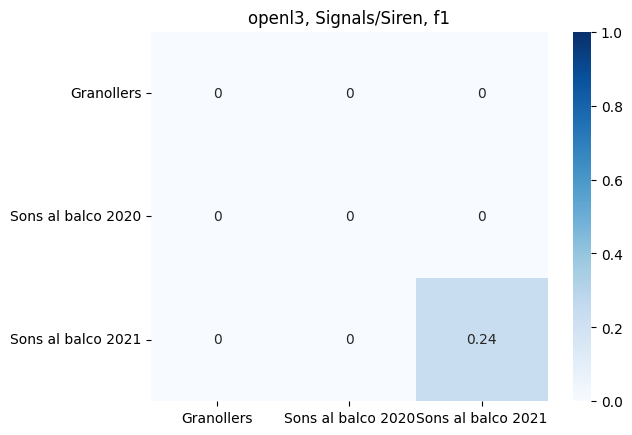

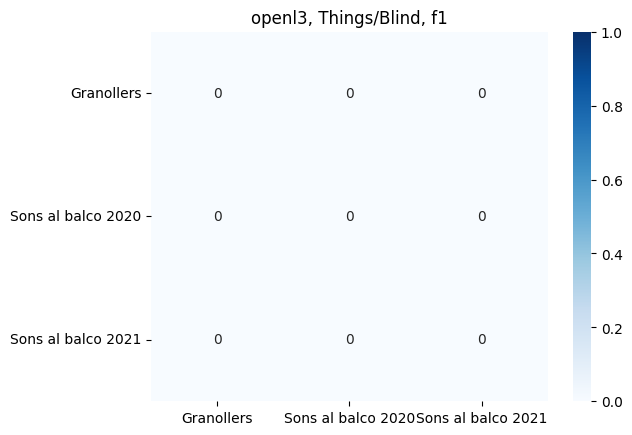

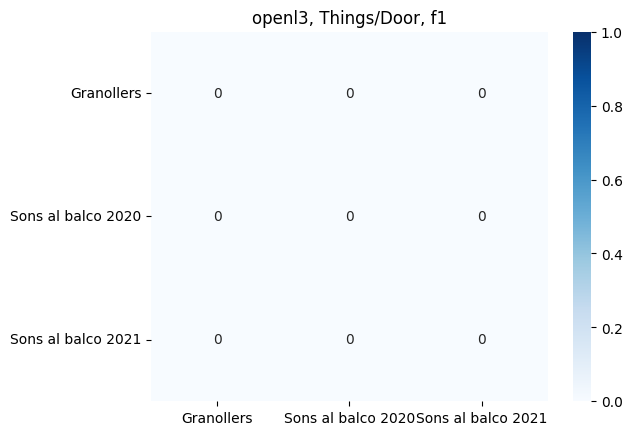

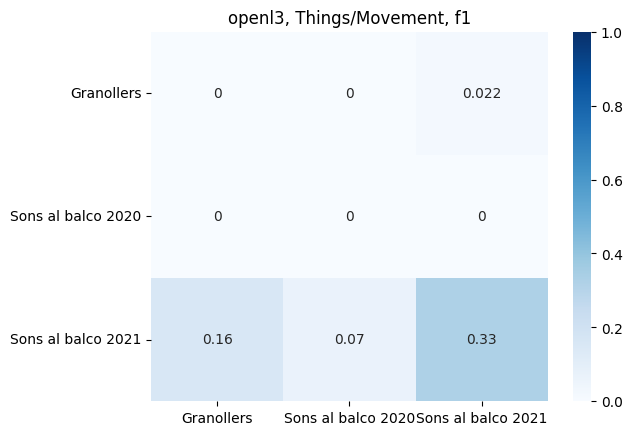

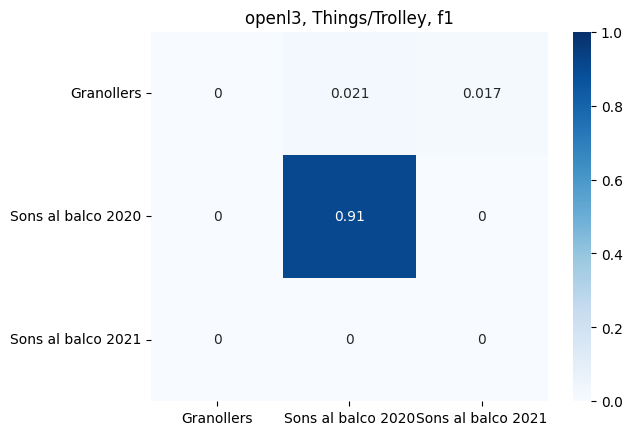

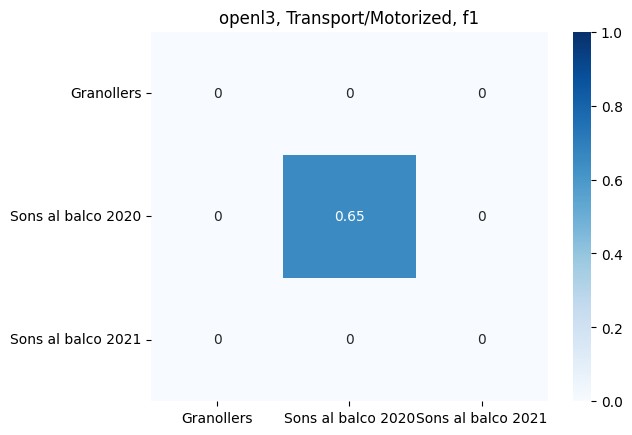

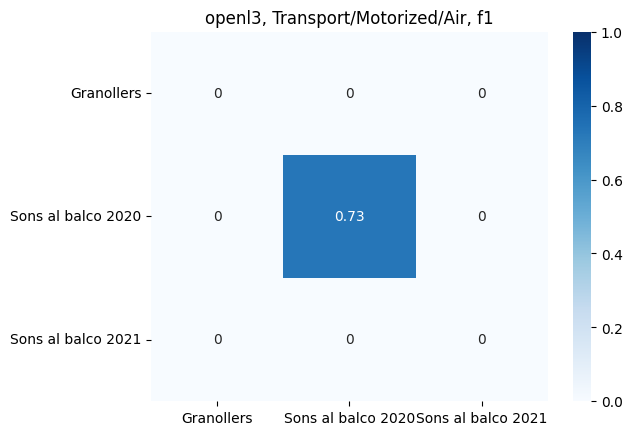

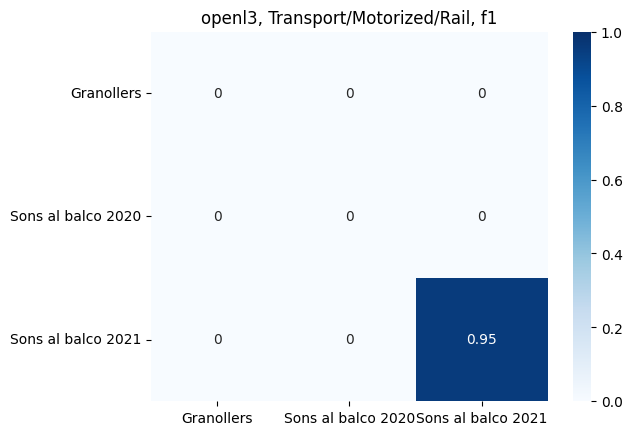

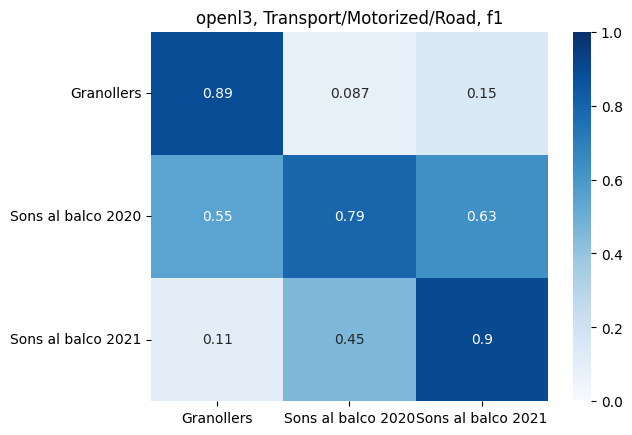

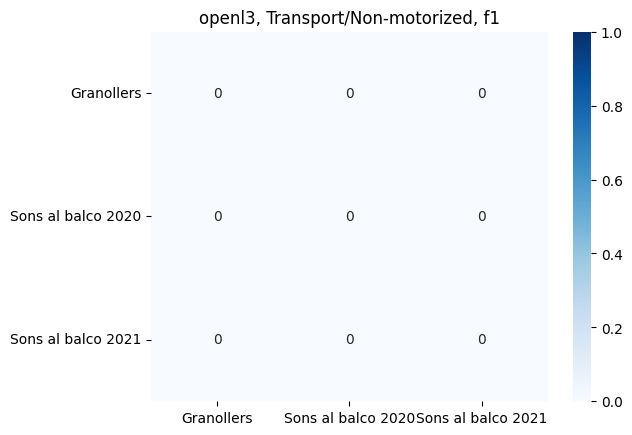

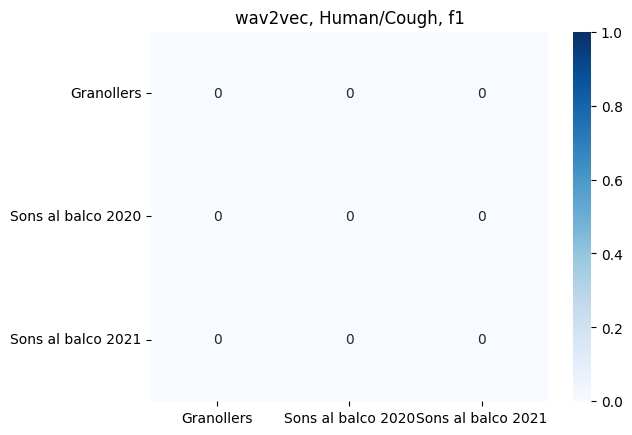

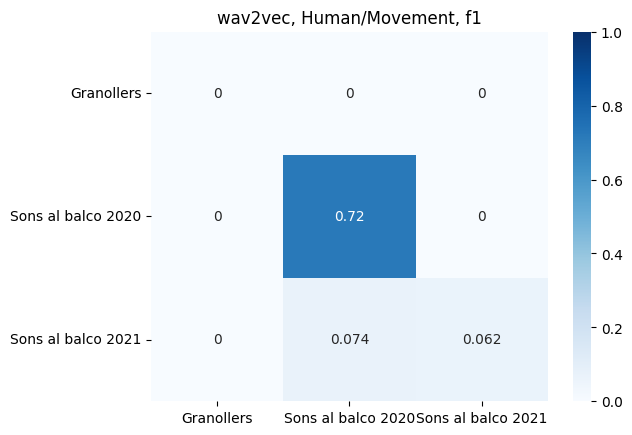

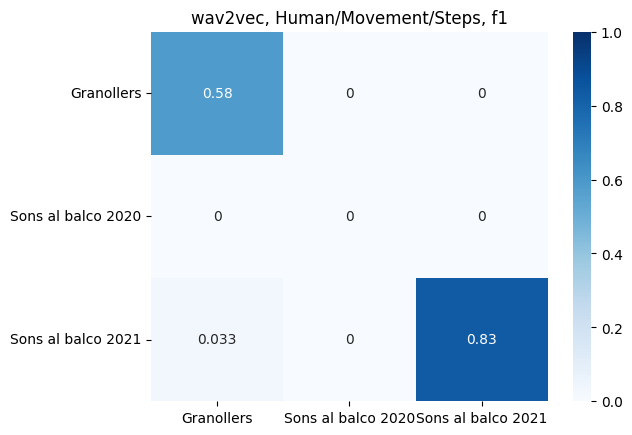

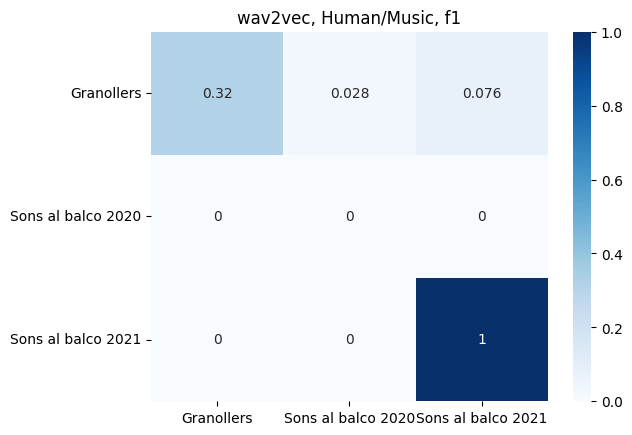

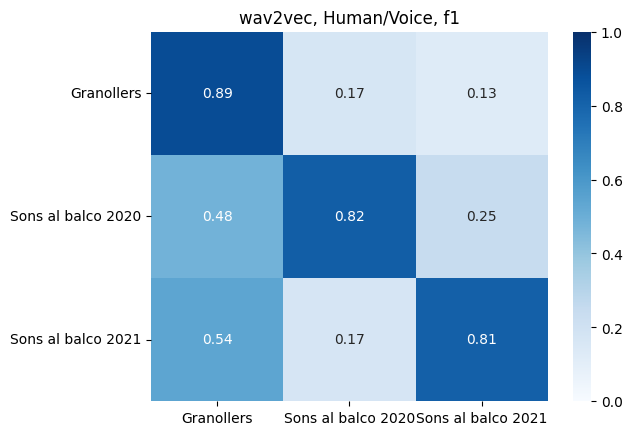

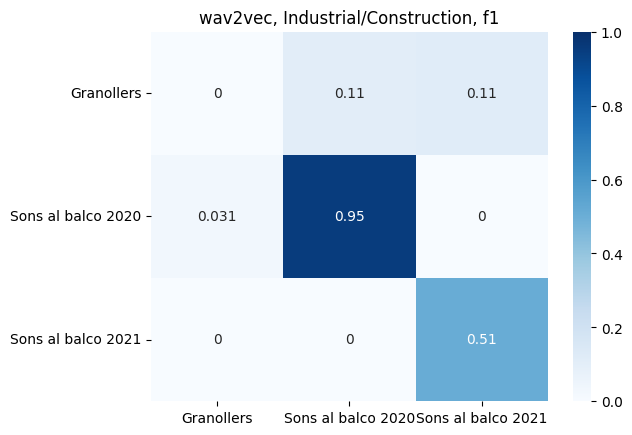

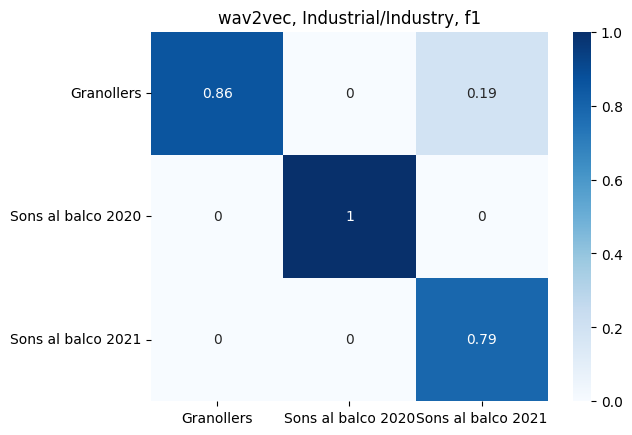

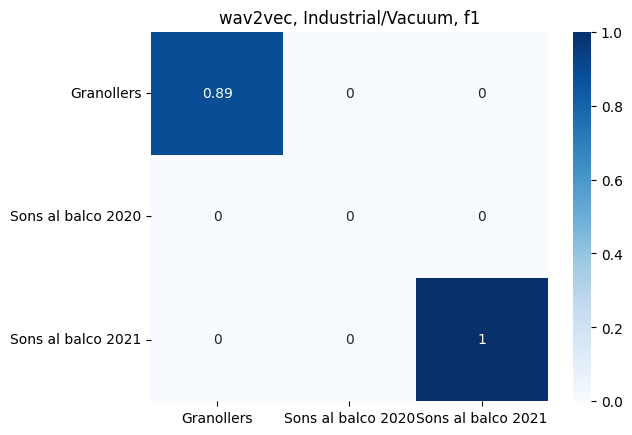

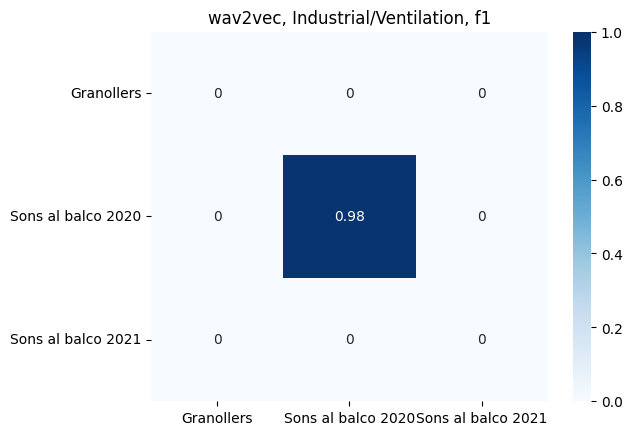

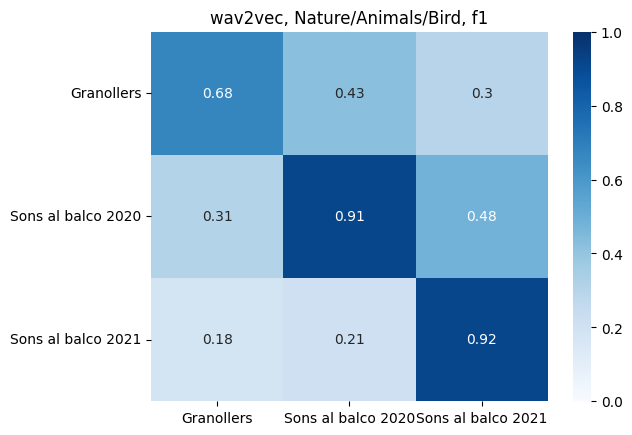

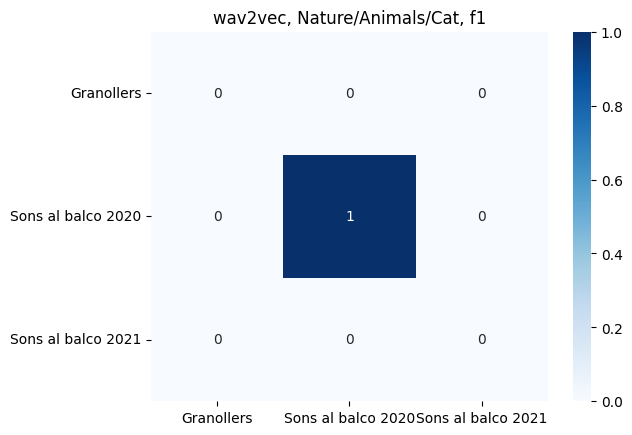

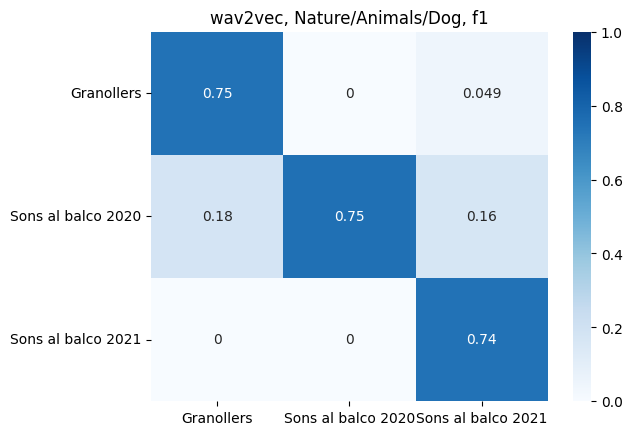

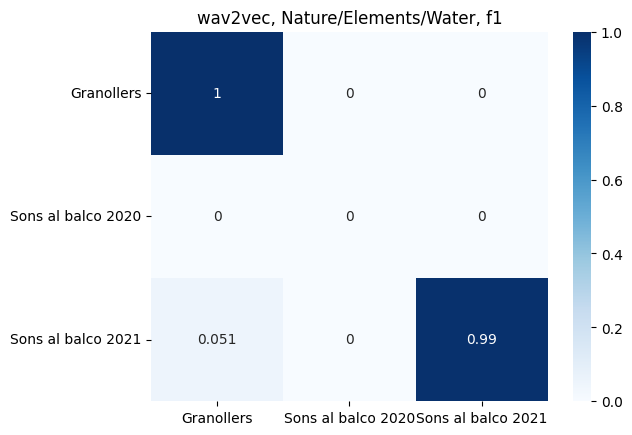

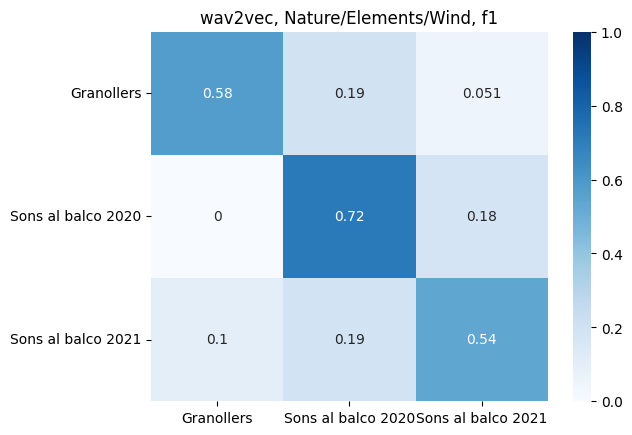

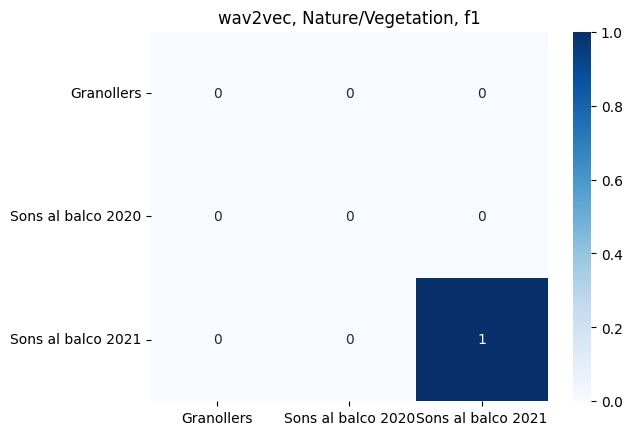

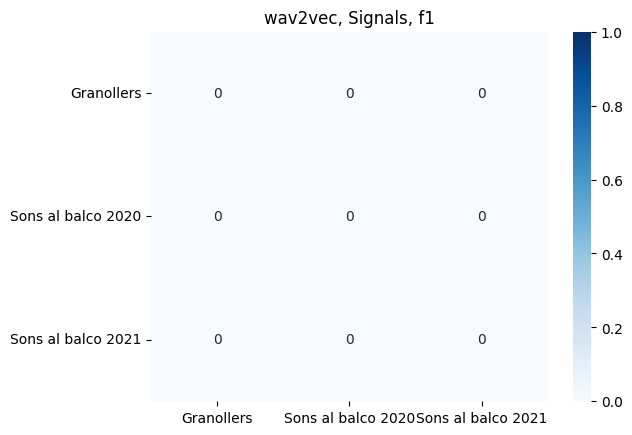

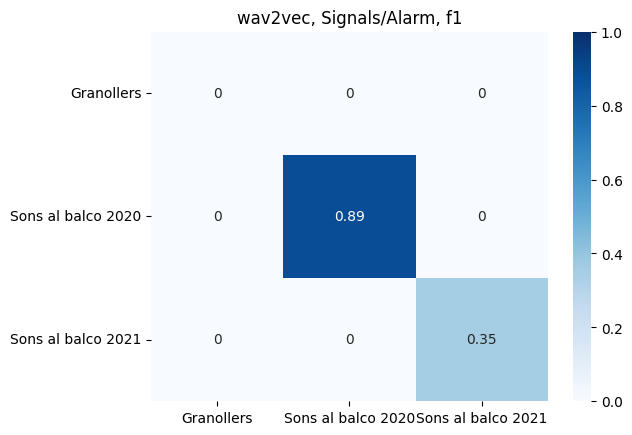

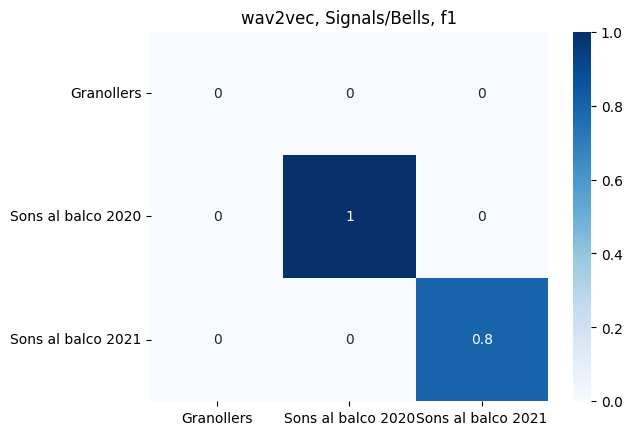

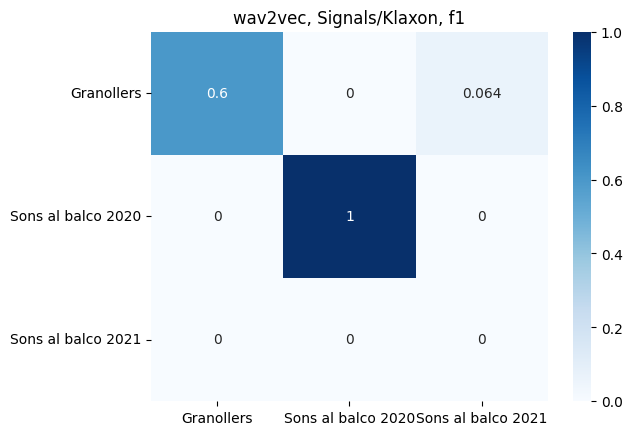

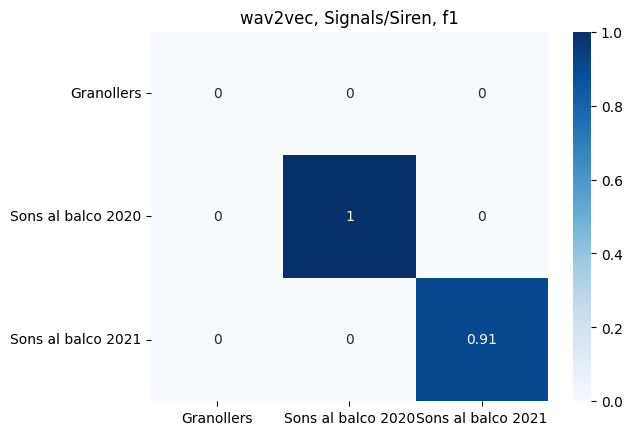

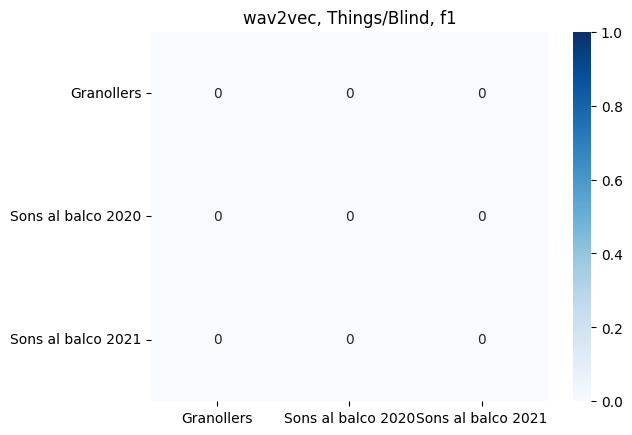

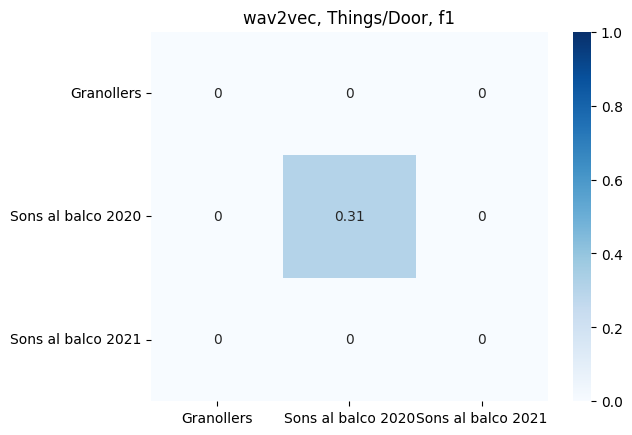

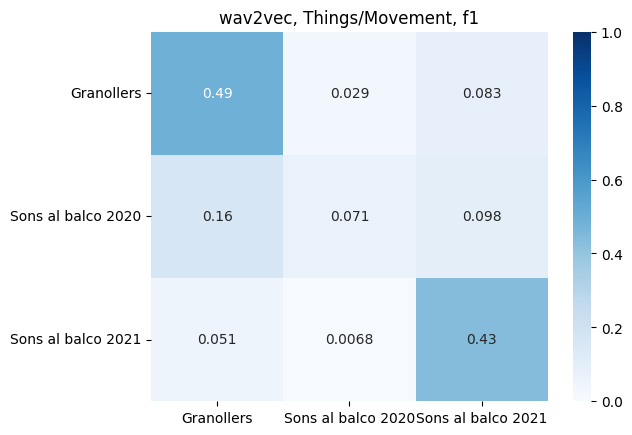

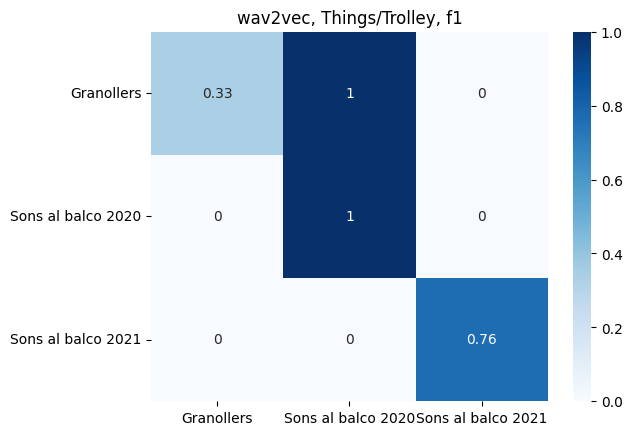

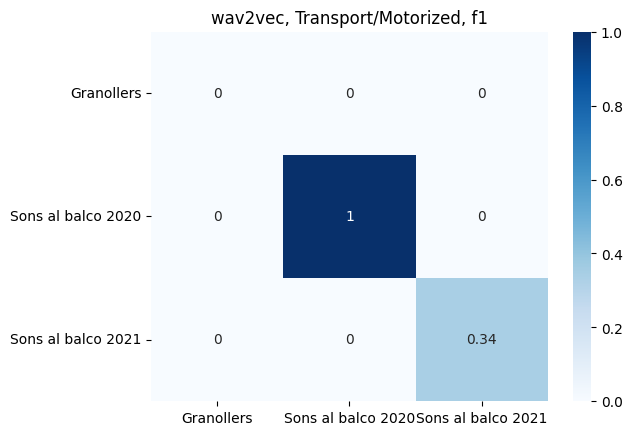

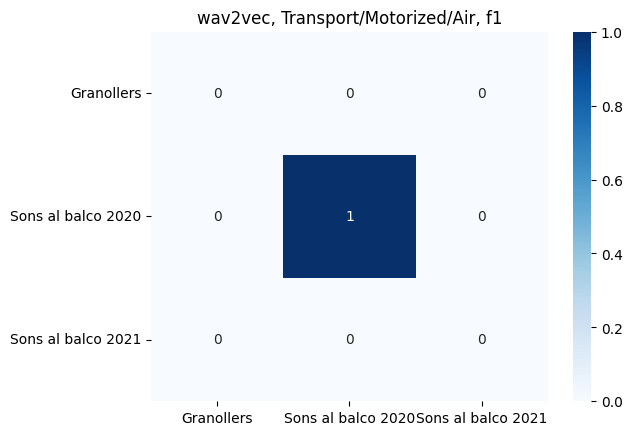

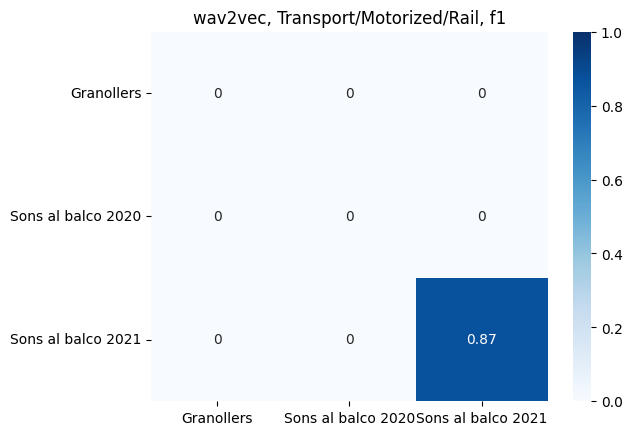

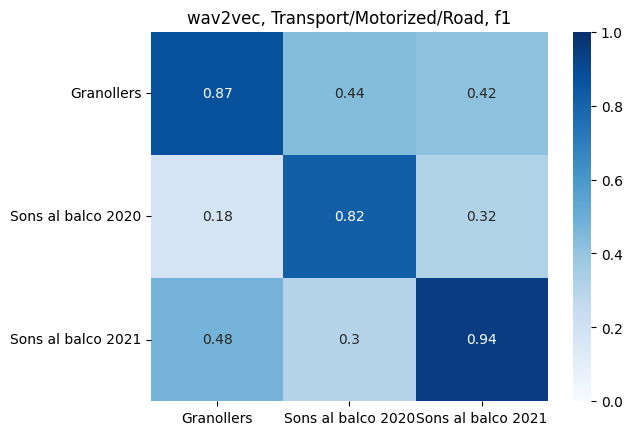

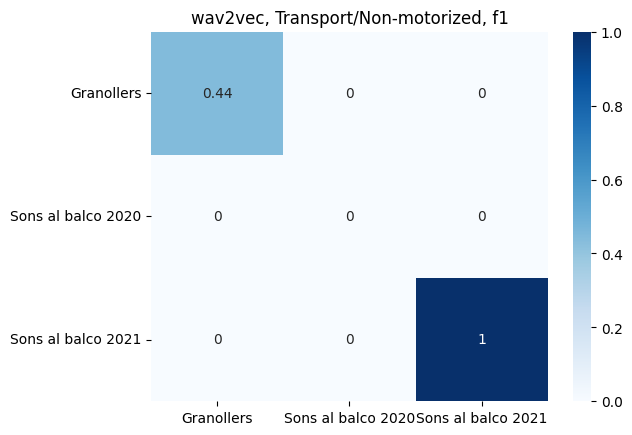

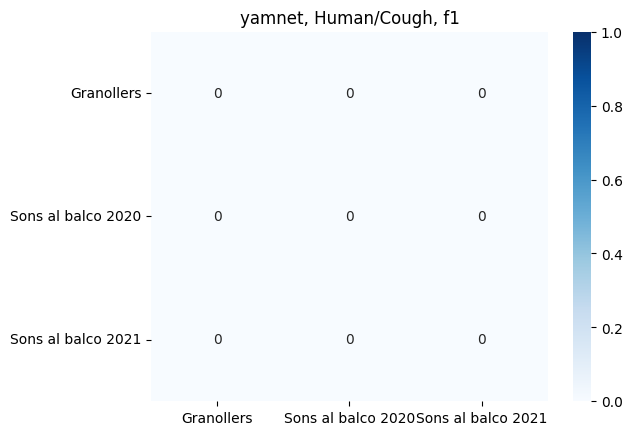

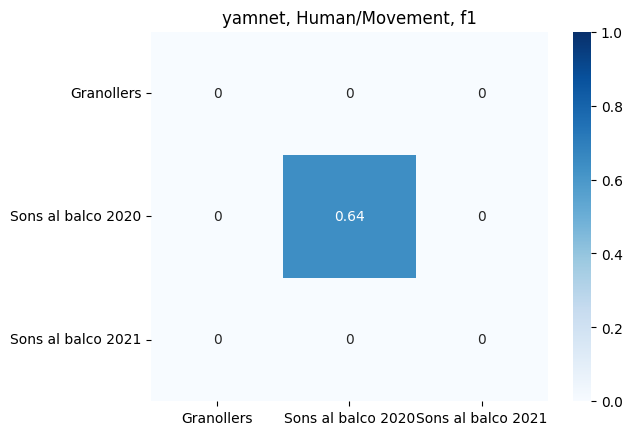

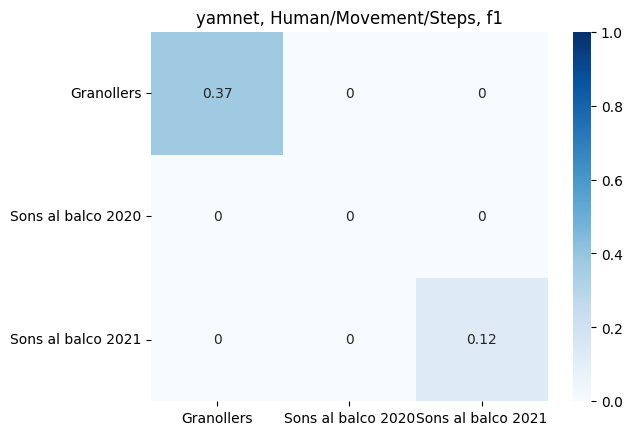

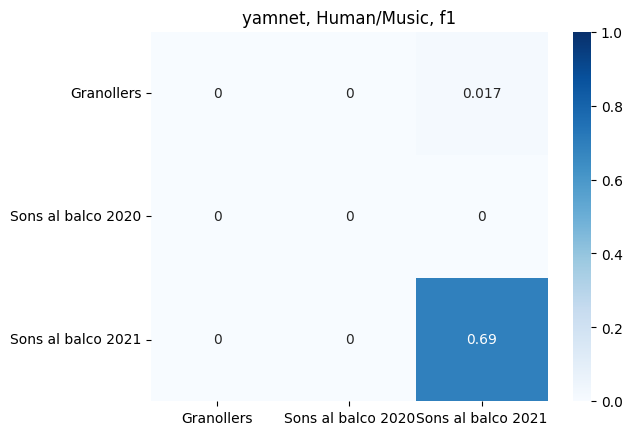

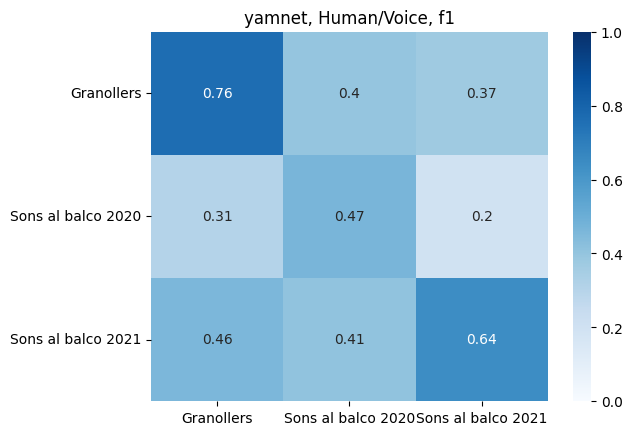

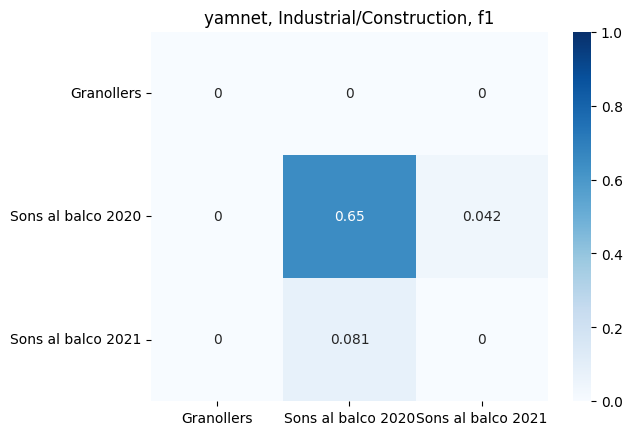

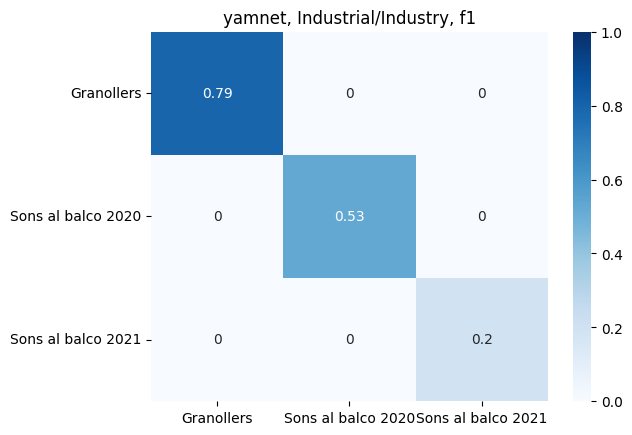

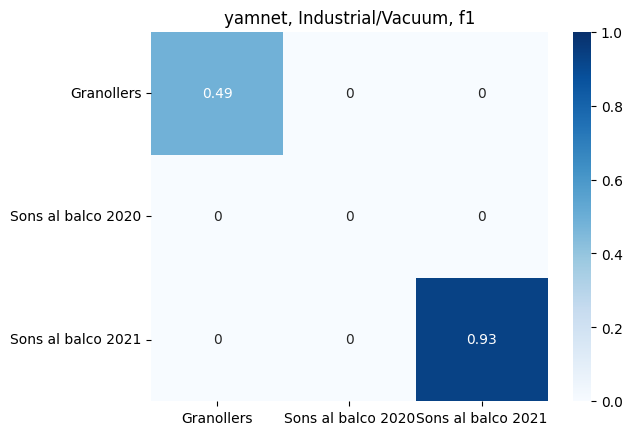

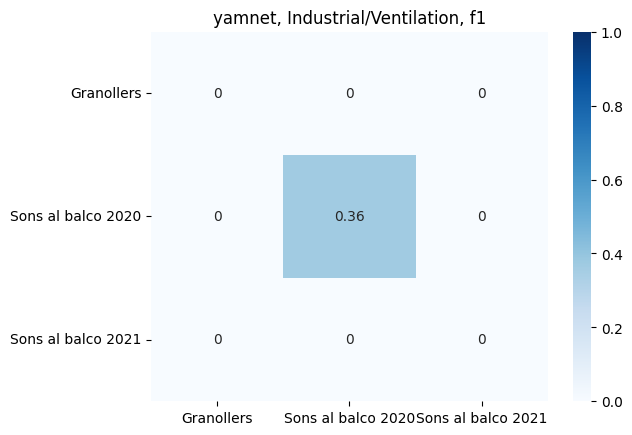

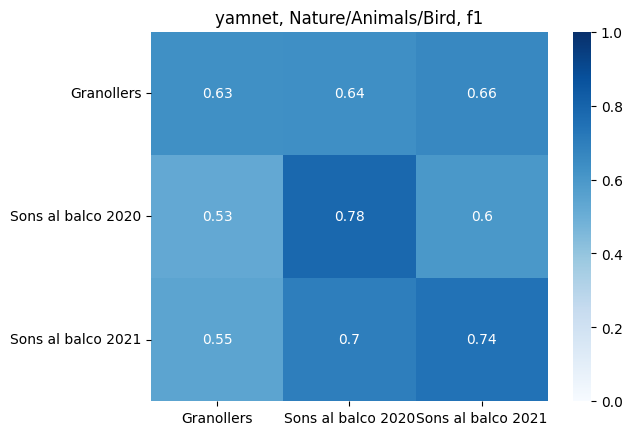

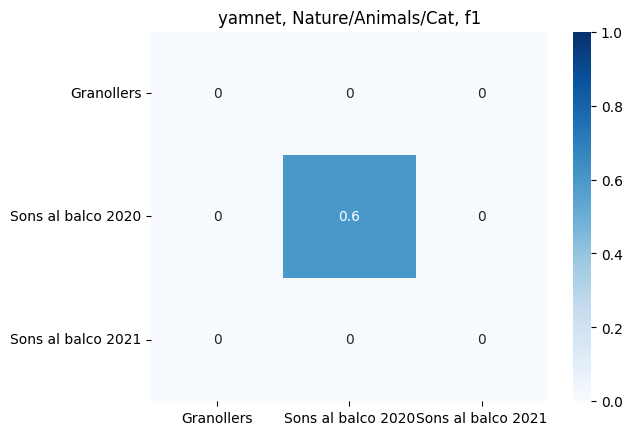

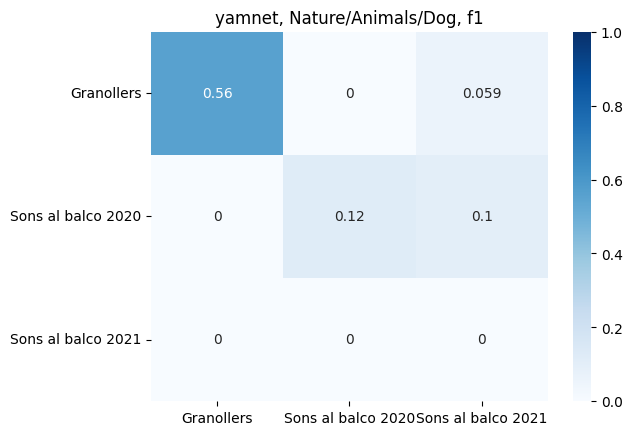

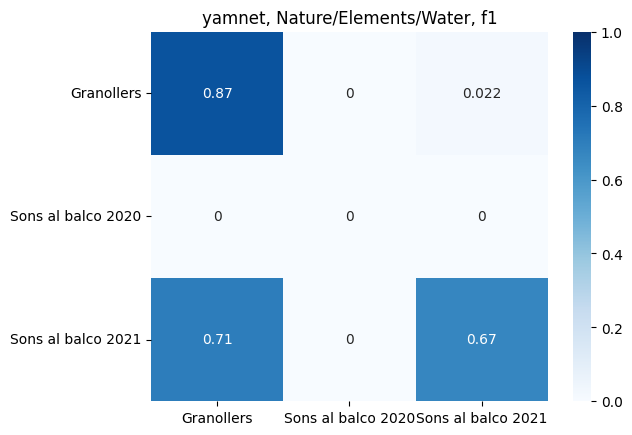

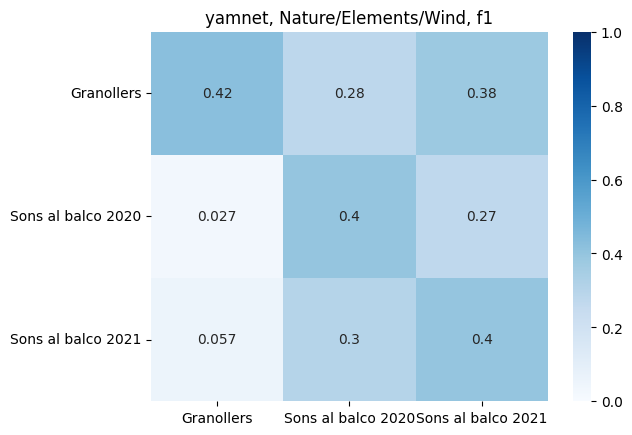

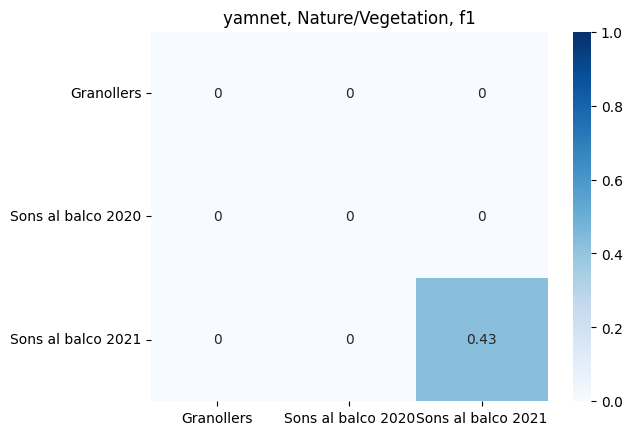

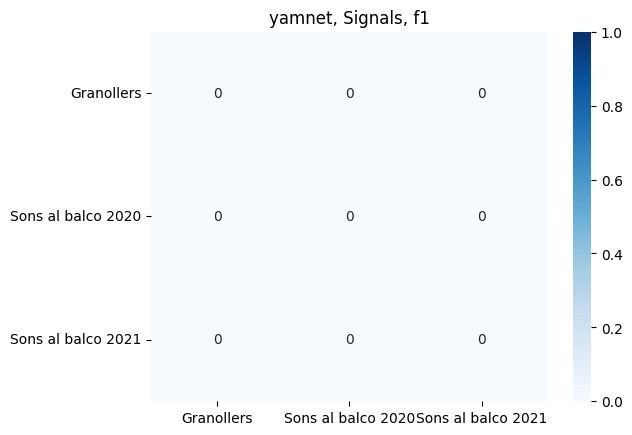

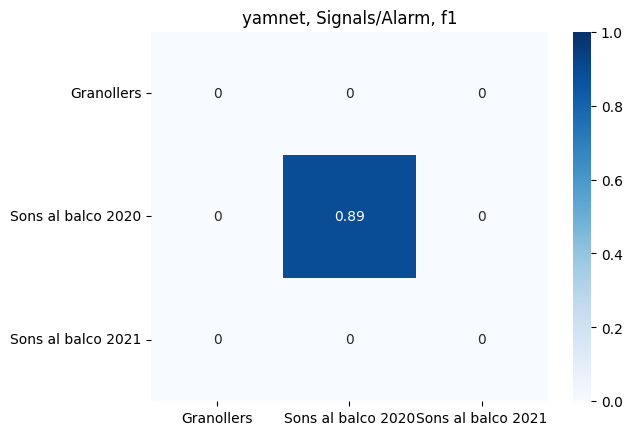

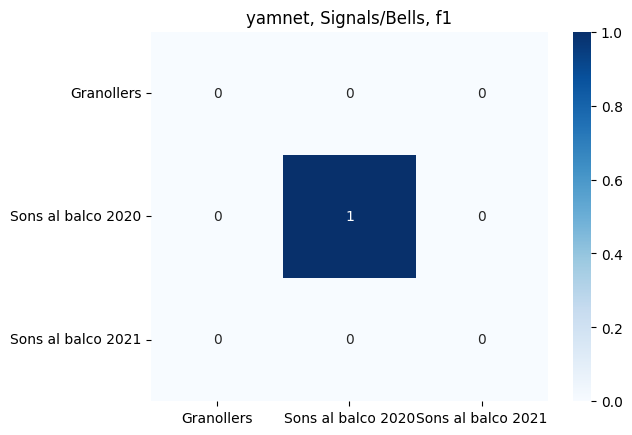

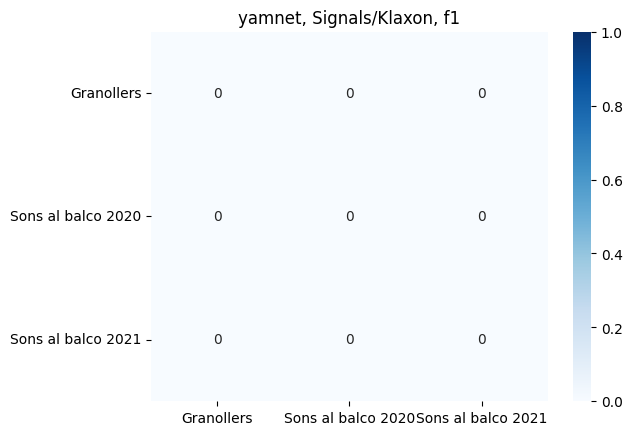

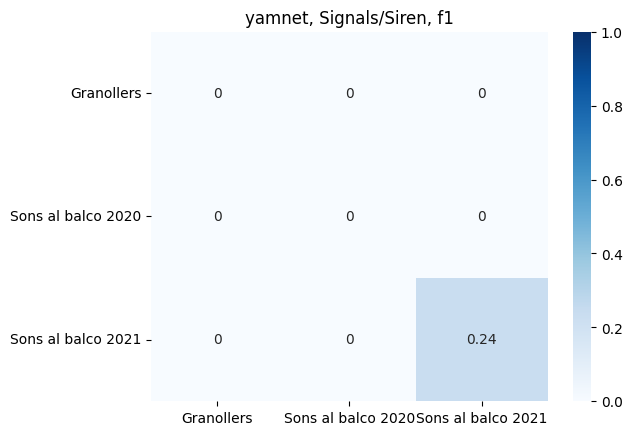

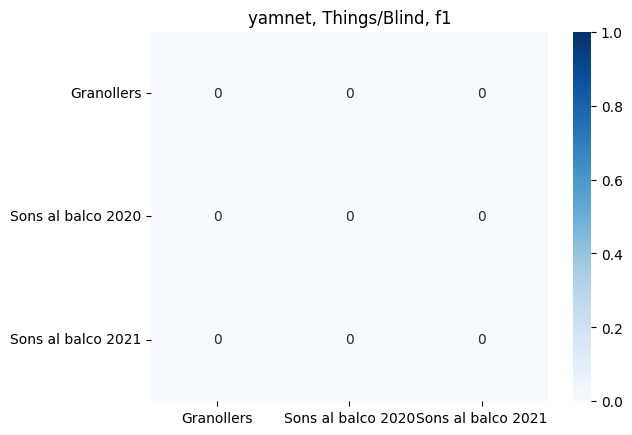

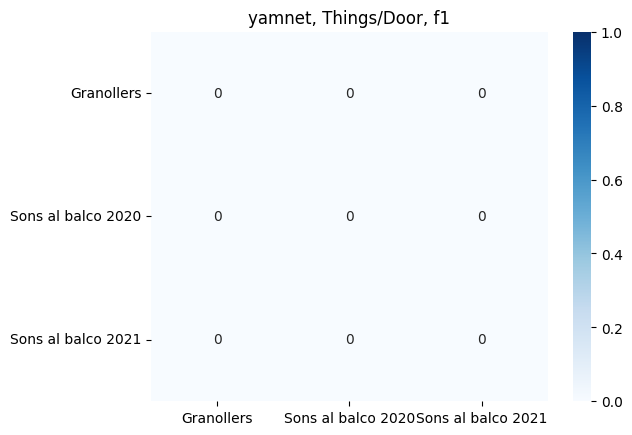

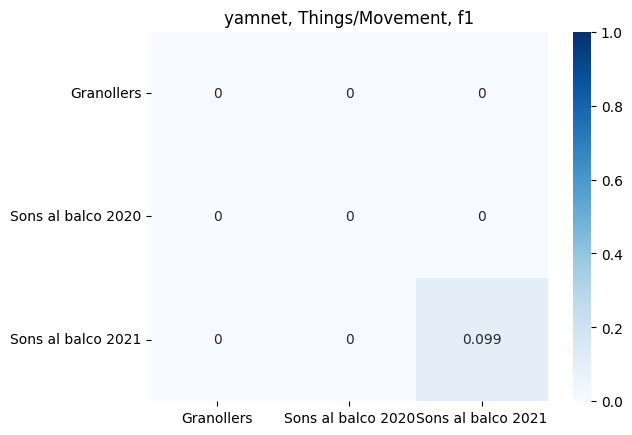

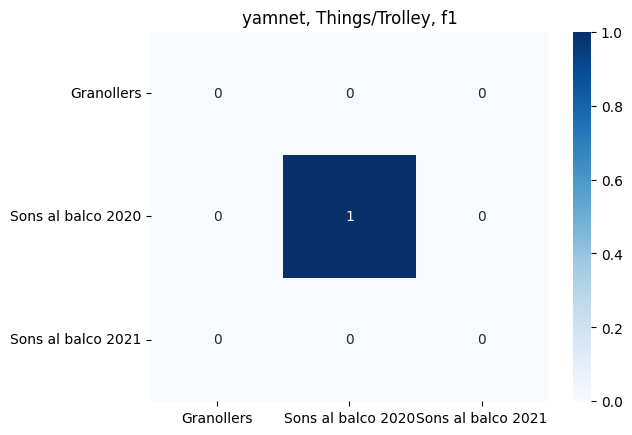

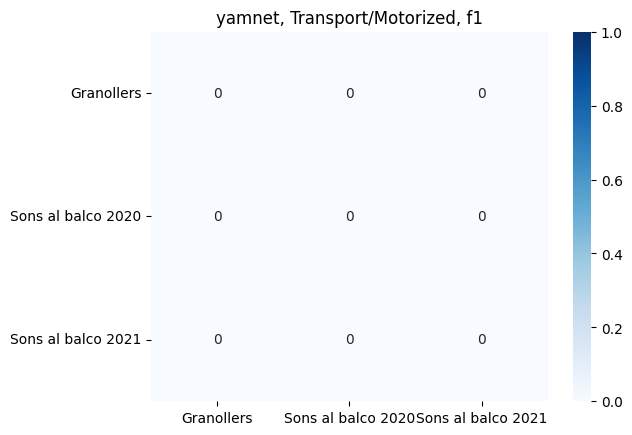

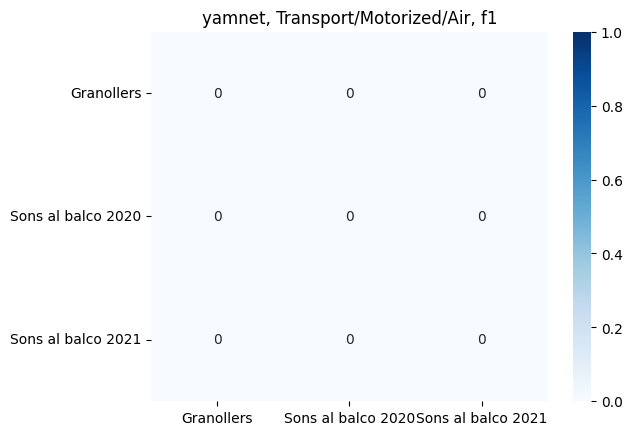

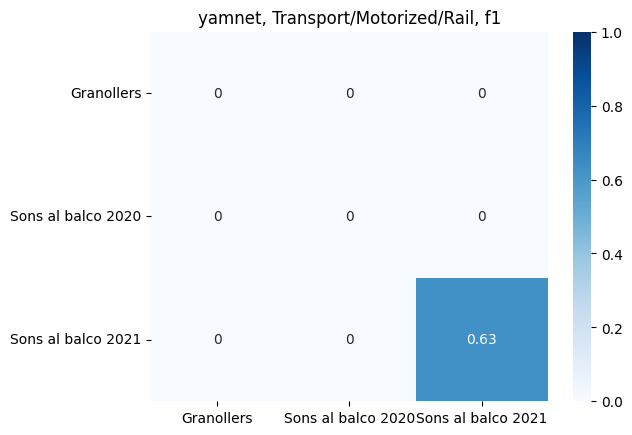

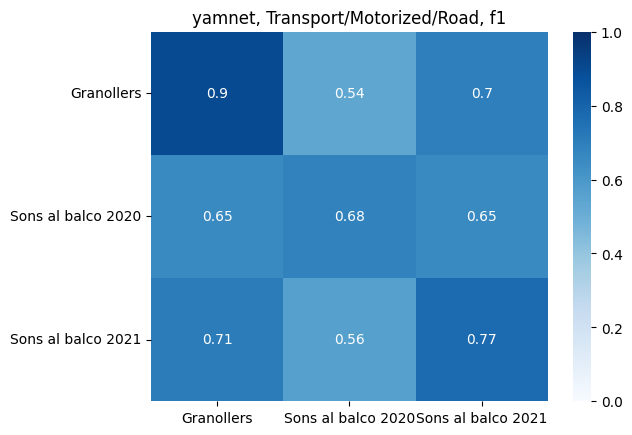

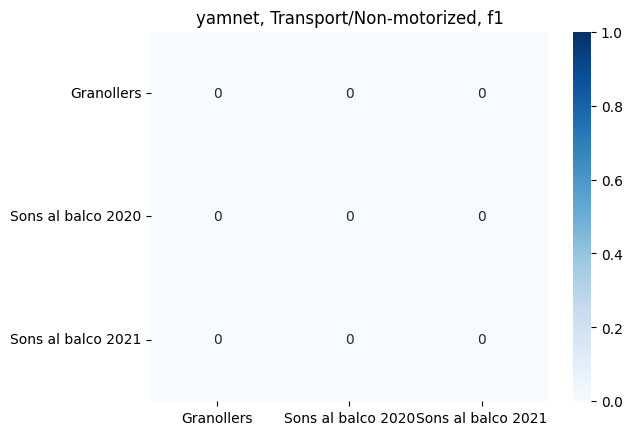

In [20]:
res_matr = {}
for model in models:
    for ind, label in enumerate(all_labels):
        res_matr["precision"] = np.zeros((len(datasets), len(datasets)))
        res_matr["recall"] = np.zeros((len(datasets), len(datasets)))
        res_matr["f1"] = np.zeros((len(datasets), len(datasets)))
        for i, d1 in enumerate(datasets):
            for j, d2 in enumerate(datasets):
                dataset_pair = (d1, d2)
                res_matr["precision"][i, j] = res[model][dataset_pair][str(ind)]["recall"]
                res_matr["recall"][i, j] = res[model][dataset_pair][str(ind)]["precision"]
                res_matr["f1"][i, j] = res[model][dataset_pair][str(ind)]["f1-score"]
    
        for key, matr in res_matr.items():
            if key == "f1":
                sns.heatmap(matr, annot=True, vmin=0, vmax=1, cmap=plt.cm.Blues, xticklabels=datasets_to_plot, yticklabels=datasets_to_plot)
                plt.title(f"{model}, {label}, {key}")
                plt.show()